In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-20-complete-player-dataset/players_15.csv
/kaggle/input/fifa-20-complete-player-dataset/players_16.csv
/kaggle/input/fifa-20-complete-player-dataset/players_17.csv
/kaggle/input/fifa-20-complete-player-dataset/players_18.csv
/kaggle/input/fifa-20-complete-player-dataset/players_19.csv
/kaggle/input/fifa-20-complete-player-dataset/teams_and_leagues.csv
/kaggle/input/fifa-20-complete-player-dataset/players_20.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
fifa = pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')

In [4]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


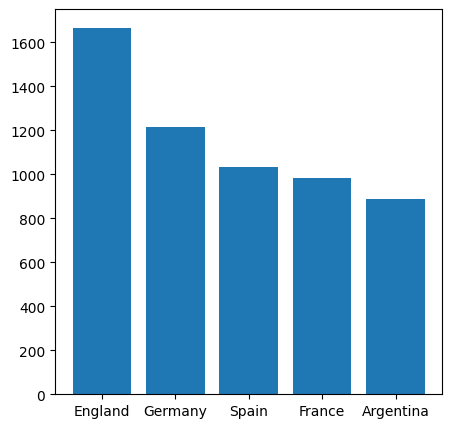

In [5]:
plt.figure(figsize=(5,5))
plt.bar(list(fifa['nationality'].value_counts()[0:5].keys()),list(fifa['nationality'].value_counts()[0:5]))
plt.show()

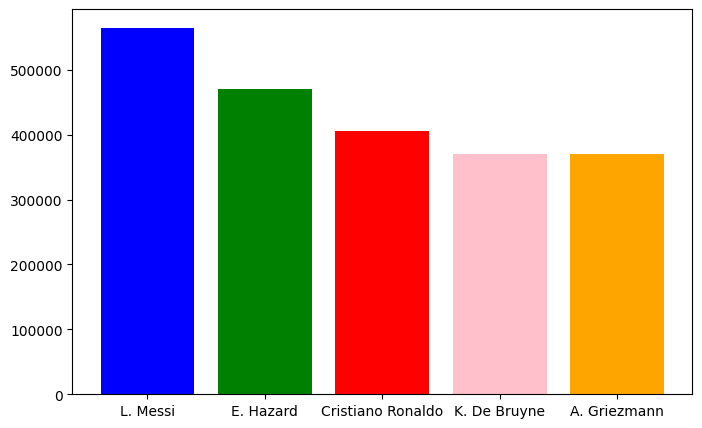

In [6]:
player_salary=fifa[['short_name','wage_eur']]
player_salary=player_salary.sort_values(by=['wage_eur'],ascending=False)
plt.figure(figsize=(8,5))
plt.bar(list(player_salary['short_name'])[0:5],list(player_salary['wage_eur'])[0:5],color=["blue","green","red","pink","orange"])
plt.show()


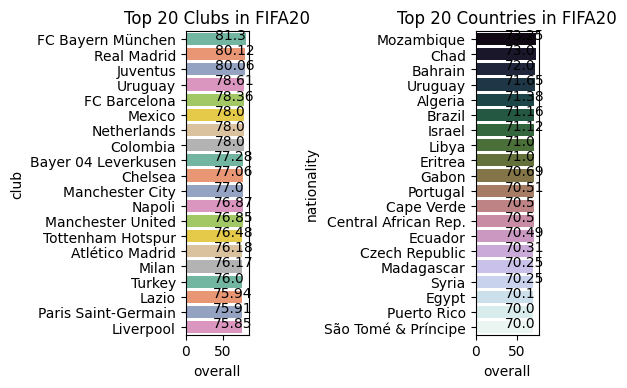

In [7]:
df_read=pd.read_csv("/kaggle/input/fifa-20-complete-player-dataset/players_20.csv")
df_read["BMI"]=df_read['weight_kg'] / (df_read['height_cm'] / 100) ** 2 
df1 = df_read[['short_name','age','dob','height_cm','weight_kg','nationality','club','overall','potential',
          'value_eur','wage_eur','player_positions','preferred_foot','international_reputation',
          'skill_moves', 'work_rate',"BMI"]]
plt.subplot(121)
top_clubs = df1.groupby(['club']).overall.mean().sort_values(ascending  = False)[:20]
plt.title("Top 20 Clubs in FIFA20")
sns.barplot(y = top_clubs.index, x = top_clubs, palette="Set2")
for index, value in enumerate(top_clubs):
    plt.text(value//2, index, str(round(value,2)))
    
plt.subplot(122)
top_countries = df1.groupby(['nationality']).overall.mean().sort_values(ascending  = False)[:20]
plt.title("Top 20 Countries in FIFA20")
sns.barplot(y = top_countries.index, x = top_countries, palette="cubehelix")
for index, value in enumerate(top_countries):
    plt.text(value//2, index, str(round(value,2)))
    
plt.tight_layout(pad=4.0)

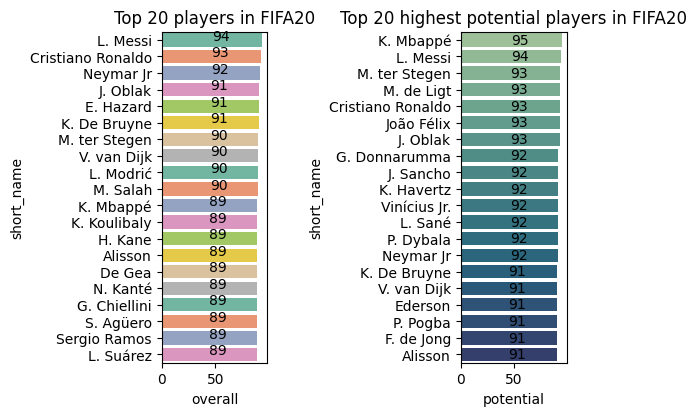

In [8]:
plt.subplot(121)
top_players = df1[['short_name', 'overall']][:20]
plt.title("Top 20 players in FIFA20")
sns.barplot(y = top_players.short_name, x = top_players.overall, palette="Set2")
for index, value in enumerate(top_players.overall):
    plt.text(value//2, index, str(value))
    
plt.subplot(122)
def plot_top20(dataframe, metric):
    metric_df = df1[['short_name', metric]].sort_values(by = [metric], ascending = False)[:20]
    plt.title(f"Top 20 highest {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette="crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value,2)), verticalalignment='center')
plot_top20(df1, 'potential')

plt.tight_layout(pad=3.0)